# COVID-19 in the United States

Illustrating the growth of COVID-19 cases in the United States, using data
aggregated by the New York Times (https://github.com/nytimes/covid-19-data)

In [16]:
# Import libraries
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import matplotlib.pyplot as plt

import datetime

In [17]:
# Analysis hyperparameters
state = 'California'

In [18]:
# Load in data
states_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
# Change date strings to datetime objects
states_df.date = pd.to_datetime(states_df.date, format='%Y-%m-%d')
states_df.head()


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


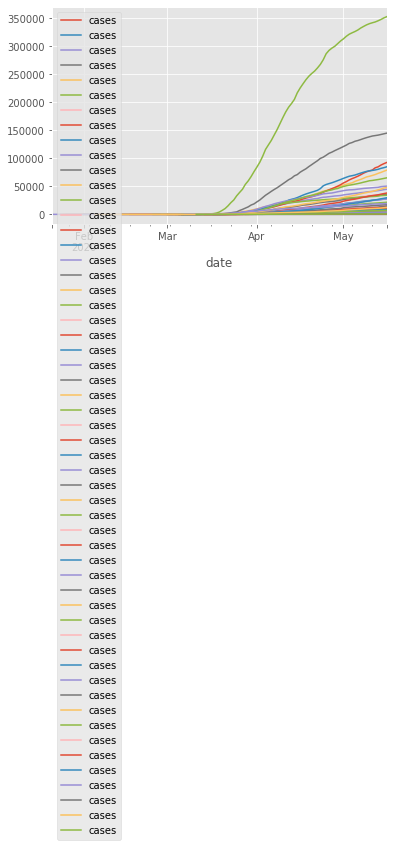

In [19]:
groupby_states = states_df.groupby('state')

with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    groupby_states.plot.line(x='date', y='cases', ax=ax)

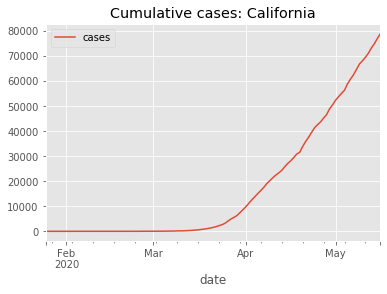

In [20]:
# Plot cumulative cases
state_df = states_df[states_df.state == state]
with plt.style.context('ggplot'):
    state_df.plot.line(x='date', y='cases')
    plt.title('Cumulative cases: {}'.format(state))

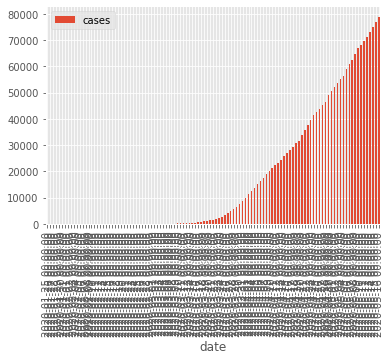

In [57]:
# TODO: Plot daily-increase cases
state_df = states_df[states_df.state == state]
with plt.style.context('ggplot'):
    # recent_state_df = state_df[datetime.datetime(2020, 4, 1) <= state_df.date]
    # recent_state_df.plot.bar(x='date', y='cases')
    state_df.plot.bar(x='date', y='cases')
    # plt.xticks(ticks=[datetime.datetime(2020, 4, 1), datetime.datetime(2020, 5, 15)])

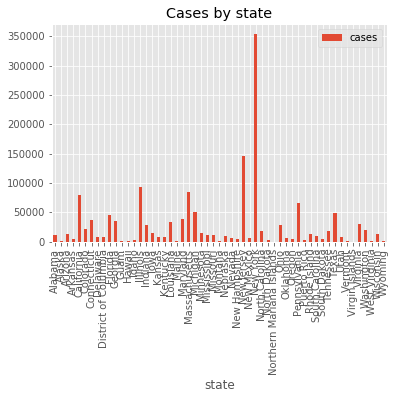

In [58]:
# Grab data from the most recent date.
recent_state_df = groupby_states.apply(lambda row: row.loc[row.date.idxmax()])

with plt.style.context('ggplot'):
    recent_state_df.plot.bar(y='cases')
    plt.title('Cases by state')

## Plot overlay on map

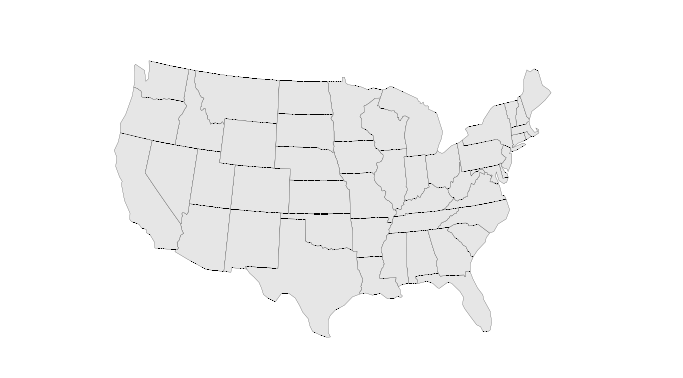

In [33]:
# Based on example: https://residentmario.github.io/geoplot/gallery/plot_usa_city_elevations.html
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

proj = gplt.crs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})
# now... change facecolor plots differ b
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9),
                   'linewidth': 0.2}

gplt.polyplot(contiguous_usa.geometry, ax=ax, **polyplot_kwargs)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


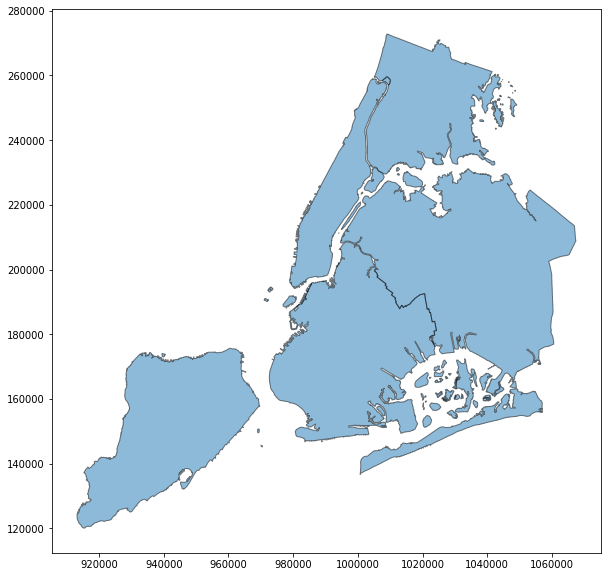

In [38]:
# Try out GeoPandas
df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df.head()

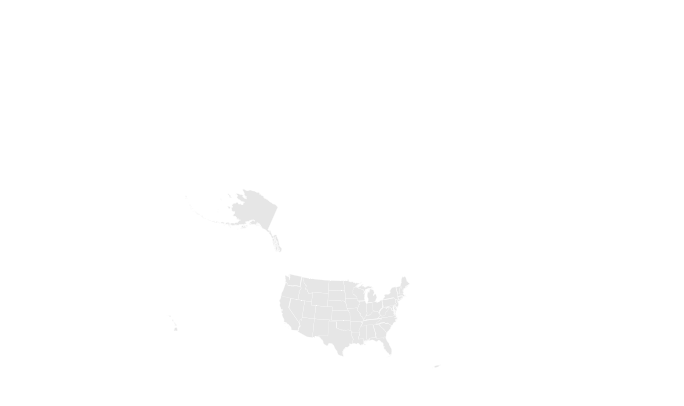

In [50]:
# contiguous_usa
# gplt.datasets.available
# gplt.datasets.get_path('contiguous_usa')
usa = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json')
usa

proj = gplt.crs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
f, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})
# now... change facecolor plots differ b
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9),
                   'linewidth': 0.2}

gplt.polyplot(usa,
              edgecolor='white',
              ax=ax, **polyplot_kwargs)

# TODO: see

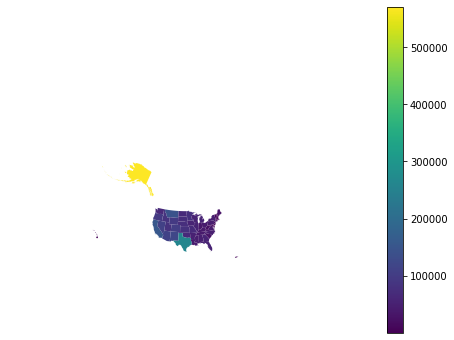

In [61]:
# Get ready to merge datasets
# usa.rename({'NAME' : 'state'}, inplace=True)
# recent_state_df

gplt.choropleth(
    usa, hue='CENSUSAREA', # scheme=scheme,
    projection=proj,
    cmap='viridis',
    legend=True,
)